In [1]:
import pandas as pd

#load data
data = pd.read_csv('./accidentsFull.csv')
#dataset variables details
#http://contents.kocw.or.kr/KOCW/document/2014/koreasejong/koosanghoe/12.pdf


In [2]:
#show datasets
data

,HOUR_I_R,ALCHL_I,ALIGN_I,STRATUM_R,WRK_ZONE,WKDY_I_R,INT_HWY,LGTCON_I_R,MANCOL_I_R,PED_ACC_R,...,SUR_COND,TRAF_CON_R,TRAF_WAY,VEH_INVL,WEATHER_R,INJURY_CRASH,NO_INJ_I,PRPTYDMG_CRASH,FATALITIES,MAX_SEV_IR
0,0,2,2,1,0,1,0,3,0,0,...,4,0,3,1,1,1,1,0,0,1
1,1,2,1,0,0,1,1,3,2,0,...,4,0,3,2,2,0,0,1,0,0
2,1,2,1,0,0,1,0,3,2,0,...,4,1,2,2,2,0,0,1,0,0
3,1,2,1,1,0,0,0,3,2,0,...,4,1,2,2,1,0,0,1,0,0
4,1,1,1,0,0,1,0,3,2,0,...,4,0,2,3,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42178,0,2,1,0,1,1,0,1,0,0,...,1,2,1,1,1,0,0,1,0,0
42179,1,2,1,1,0,0,0,1,0,0,...,1,0,1,1,1,1,1,0,0,1
42180,0,2,2,0,0,1,0,1,0,0,...,1,0,1,1,1,0,0,1,0,0
42181,1,2,1,1,0,1,0,1,0,0,...,1,0,1,1,1,0,0,1,0,0


In [3]:
#show categories
data.columns

Index(['HOUR_I_R', 'ALCHL_I', 'ALIGN_I', 'STRATUM_R', 'WRK_ZONE', 'WKDY_I_R',
       'INT_HWY', 'LGTCON_I_R', 'MANCOL_I_R', 'PED_ACC_R', 'RELJCT_I_R',
       'REL_RWY_R', 'PROFIL_I_R', 'SPD_LIM', 'SUR_COND', 'TRAF_CON_R',
       'TRAF_WAY', 'VEH_INVL', 'WEATHER_R', 'INJURY_CRASH', 'NO_INJ_I',
       'PRPTYDMG_CRASH', 'FATALITIES', 'MAX_SEV_IR'],
      dtype='object')

In [4]:
#data analysis
#no missing values
data.describe()

,HOUR_I_R,ALCHL_I,ALIGN_I,STRATUM_R,WRK_ZONE,WKDY_I_R,INT_HWY,LGTCON_I_R,MANCOL_I_R,PED_ACC_R,...,SUR_COND,TRAF_CON_R,TRAF_WAY,VEH_INVL,WEATHER_R,INJURY_CRASH,NO_INJ_I,PRPTYDMG_CRASH,FATALITIES,MAX_SEV_IR
count,42183.000000,42183.000000,42183.000000,42183.000000,42183.000000,42183.000000,42183.000000,42183.000000,42183.000000,42183.000000,...,42183.000000,42183.000000,42183.000000,42183.000000,42183.000000,42183.000000,42183.000000,42183.000000,42183.000000,42183.000000
mean,0.429344,1.912832,1.131546,0.491620,0.022616,0.771614,0.150321,1.492521,1.337079,0.040514,...,1.290710,0.516322,1.477491,1.816964,1.142783,0.497736,0.778702,0.491217,0.011047,0.519830
std,0.494988,0.282084,0.338000,0.499936,0.148677,0.419797,0.418952,0.789874,0.929756,0.197164,...,0.780524,0.749417,0.584851,0.684843,0.349855,0.500001,1.035169,0.499929,0.104524,0.521256
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,...,1.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,2.000000,0.000000,...,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,9.000000,3.000000,2.000000,1.000000,...,9.000000,2.000000,3.000000,23.000000,2.000000,1.000000,31.000000,1.000000,1.000000,2.000000


In [5]:
#각 요소별 데이터 counting
for i in data.columns:
    print(data[i].value_counts())



HOUR_I_R
0    24072
1    18111
Name: count, dtype: int64
ALCHL_I
2    38506
1     3677
Name: count, dtype: int64
ALIGN_I
1    36634
2     5549
Name: count, dtype: int64
STRATUM_R
0    21445
1    20738
Name: count, dtype: int64
WRK_ZONE
0    41229
1      954
Name: count, dtype: int64
WKDY_I_R
1    32549
0     9634
Name: count, dtype: int64
INT_HWY
0    36066
1     6089
9       28
Name: count, dtype: int64
LGTCON_I_R
1    29294
3     7887
2     5002
Name: count, dtype: int64
MANCOL_I_R
2    27738
0    13519
1      926
Name: count, dtype: int64
PED_ACC_R
0    40474
1     1709
Name: count, dtype: int64
RELJCT_I_R
1    23535
0    18648
Name: count, dtype: int64
REL_RWY_R
1    32335
0     9848
Name: count, dtype: int64
PROFIL_I_R
0    31923
1    10260
Name: count, dtype: int64
SPD_LIM
35    8541
55    6594
45    6587
40    4304
25    4205
30    3715
65    2715
50    1665
60    1658
70    1454
75     283
20     251
15     183
10      22
5        6
Name: count, dtype: int64
SUR_COND
1    33605

In [6]:
#가변수 Injury 생성
data['Injury'] = ["NO" if x == 0 else "YES" for x in data['MAX_SEV_IR']]

In [7]:
# a : Yes로 설정하는 것이 맞다. 그 이유는 Yes인 경우가 No인 경우보다 많아, Yes로 설정하는 것이 더 맞다.
data['Injury'].value_counts()

Injury
YES    21462
NO     20721
Name: count, dtype: int64

### B

In [8]:
#b
picked_data = data[:12]
val1_name = "WEATHER_R"
val2_name = "TRAF_CON_R"
target_name = "Injury"


In [9]:
#b-1
pivot_table = pd.pivot_table(picked_data, index=val1_name, columns=val2_name, values=target_name, aggfunc='count', fill_value=0)
pivot_table

TRAF_CON_R,0,1,2
WEATHER_R,,,
1,3,1,1
2,6,1,0


In [10]:
#b-2 베이즈 조건부확률 계산
exact_baise_condition_prob = pivot_table / pivot_table.sum(axis=0)
exact_baise_condition_prob

TRAF_CON_R,0,1,2
WEATHER_R,,,
1,0.333333,0.5,1.0
2,0.666667,0.5,0.0


## B-3

In [11]:
#b-3
#target data를 이용해서 위에서 계산된 조건부확률을 이용해 predict
prob_bayse = picked_data.copy()
prob_bayse = picked_data[["WEATHER_R", "TRAF_CON_R", "Injury"]]
prob_bayse['predict'] = picked_data.apply(lambda x: exact_baise_condition_prob.loc[x[val1_name], x[val2_name]], axis=1)
prob_bayse["cutoff"] = prob_bayse["predict"].apply(lambda x: "YES" if x > 0.5 else "NO")
prob_bayse

/tmp/ipykernel_2324072/1956917227.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prob_bayse['predict'] = picked_data.apply(lambda x: exact_baise_condition_prob.loc[x[val1_name], x[val2_name]], axis=1)
/tmp/ipykernel_2324072/1956917227.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prob_bayse["cutoff"] = prob_bayse["predict"].apply(lambda x: "YES" if x > 0.5 else "NO")


,WEATHER_R,TRAF_CON_R,Injury,predict,cutoff
0,1,0,YES,0.333333,NO
1,2,0,NO,0.666667,YES
2,2,1,NO,0.500000,NO
3,1,1,NO,0.500000,NO
4,1,0,NO,0.333333,NO
5,2,0,YES,0.666667,YES
6,2,0,NO,0.666667,YES
7,1,0,YES,0.333333,NO
8,2,0,NO,0.666667,YES
9,2,0,NO,0.666667,YES


## B-4

In [14]:
#if injury = True, weather = 1
target_data = picked_data[['WEATHER_R', 'TRAF_CON_R', 'Injury']]
injury_weather1 = len(target_data[(target_data["WEATHER_R"] == 1) & (target_data["Injury"] == "YES")])
injury = len(target_data[(target_data["Injury"] == "YES")])
p_ifinjuy_weather1 = injury_weather1 / injury
injury_tarf1 = len(target_data[(target_data["TRAF_CON_R"] == 1) & (target_data["Injury"] == "YES")])
p_ifinjuy_tarf1 = injury_tarf1 / injury
p_ifinjuy_tarf1
inj_Y = len(target_data[(target_data["Injury"] == "YES")]) / len(target_data)
inj_Y


0.25

In [15]:
#if injury = FALSE, weather = 1
no_injury_weather1 = len(target_data[(target_data["WEATHER_R"] == 1) & (target_data["Injury"] == "NO")])
no_injury = len(target_data[(target_data["Injury"] == "NO")])
p_no_ifinjuy_weather1 = no_injury_weather1 / injury
no_injury_tarf1 = len(target_data[(target_data["TRAF_CON_R"] == 1) & (target_data["Injury"] == "NO")])
p_no_ifinjuy_weather1 = no_injury_tarf1 / no_injury
p_no_ifinjuy_weather1
no_inj_Y = len(target_data[(target_data["Injury"] == "NO")]) / len(target_data)
no_inj_Y
upper = (inj_Y * p_ifinjuy_weather1 * p_ifinjuy_tarf1)
down = (no_inj_Y * p_no_ifinjuy_weather1 * p_no_ifinjuy_weather1)
result = upper/(upper+down)
result

0.0

### B-5

In [16]:
import numpy as np
from sklearn.naive_bayes import CategoricalNB

seed = np.random.RandomState(100)
x = picked_data[["WEATHER_R", "TRAF_CON_R"]]
y = picked_data["Injury"]
clf = CategoricalNB().fit(x, y)
clf.predict(x) 

array(['NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO'], dtype='<U3')

### C-0

In [90]:
from sklearn.model_selection import train_test_split

def pre_processing_for_No_INJ_I(x):
    if x == 0:
        return 0
    elif x < 5:
        return 1
    else:
        return 2

def pre_processing_for_veh_INVL(x):
    if x < 5:
        return x
    else:
        return 6    



### C-1

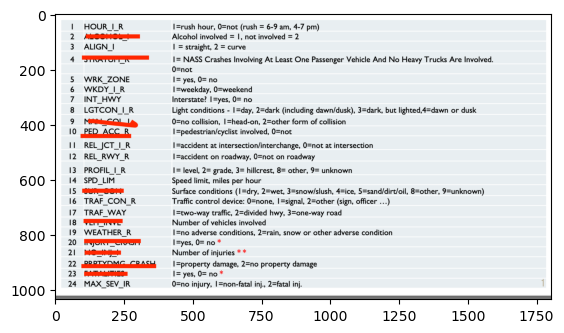

In [124]:
from matplotlib import pyplot as plt
from matplotlib.image import imread
plt.imshow(imread('./vari.png'))

In [125]:
pre_processed_data = data.copy()
pre_processed_data = pre_processed_data.drop(['ALCHL_I', 'STRATUM_R', 'MANCOL_I_R', 'PED_ACC_R', 'SUR_COND', 'VEH_INVL', 'INJURY_CRASH', 'NO_INJ_I', 'PRPTYDMG_CRASH', 'FATALITIES', 'MAX_SEV_IR'], axis=1)
pre_processed_data["NO_INJ_I"] = data.copy()["NO_INJ_I"].apply(pre_processing_for_No_INJ_I)
pre_processed_data["VEH_INVL"] = data.copy()["VEH_INVL"].apply(pre_processing_for_veh_INVL)
x = pre_processed_data.copy().drop(['Injury'], axis=1)
y = pre_processed_data.copy()['Injury']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=3)

### C-2

In [126]:
import numpy as np
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import confusion_matrix, accuracy_score

clf_with_full_dataset = CategoricalNB().fit(x_train, y_train)
print(accuracy_score(y_train, clf_with_full_dataset.predict(x_train)))
confusion_matrix(y_train, clf_with_full_dataset.predict(x_train))

1.0


array([[12446,     0],
       [    0, 12863]])

### C-3

In [130]:
print(accuracy_score(y_test, clf_with_full_dataset.predict(x_test)))
print(clf_with_full_dataset.predict_proba(x_test)[:15])
print(clf_with_full_dataset.predict(x_test)[:15])
confusion_matrix(y_test, clf_with_full_dataset.predict(x_test))

1.0
[[7.57440214e-05 9.99924256e-01]
 [9.99919289e-01 8.07106564e-05]
 [7.76393341e-05 9.99922361e-01]
 [3.19236051e-05 9.99968076e-01]
 [9.99870647e-01 1.29352789e-04]
 [9.99949187e-01 5.08127995e-05]
 [7.92611379e-05 9.99920739e-01]
 [8.38153698e-05 9.99916185e-01]
 [9.99938786e-01 6.12140782e-05]
 [9.99936755e-01 6.32445807e-05]
 [7.53317805e-05 9.99924668e-01]
 [6.46175242e-05 9.99935382e-01]
 [9.99925688e-01 7.43120703e-05]
 [6.50816025e-05 9.99934918e-01]
 [3.63842354e-05 9.99963616e-01]]
['YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'YES' 'NO'
 'YES' 'YES']


array([[8275,    0],
       [   0, 8599]])

### C-4

In [119]:
# p(injury=1 | weather=1, traf_con=0) 
# p(injury=1 | weather=1, traf_con=1) 
# p(injury=1 | weather=1, traf_con=2) 
# p(injury=1 | weather=0, traf_con=0)
# p(injury=1 | weather=0, traf_con=1)
# p(injury=1 | weather=0, traf_con=2) 

